In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import scipy
from sklearn.datasets import make_blobs
import random
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

In [2]:
np.random.seed(99)

In [3]:
class KMeans():

    def __init__(self, data, k, precision=5):
        self.data = data
        self.k = k
        self.precision = precision
         # the centers (i.e. mean feature vector) for each cluster
        self.centroids = []
        # list of sample indices for each cluster and its respective size
        self.clusters = []
        self.cluster_sizes = []

    @staticmethod
    def dist(p1, p2):
        """Method returns the euclidean distance between two points"""
        return np.linalg.norm(np.array(p1) - np.array(p2))

    @staticmethod
    def cal_centroids(_, precision):
        """Method returns centroids for input list of clusters"""
        centroids = []
        for item in _:
            ele = len(item[0])
            c_item = []
            for i in range(ele):
                c_item.append(round(np.mean([li[i] for li in item]), precision))
            centroids.append(c_item)
        return centroids

    @staticmethod
    def compare_lists(list_1, list_2):
        """Method returns True when the two lists are same else returns False"""
        flag = True
        for item in list_1:
            if item not in list_2:
                flag = False
            break
        if flag:
            return True
        else:
            return False

    def fit(self):
        """Method that does the clustering"""
        # Randomly selects indices of initial centroids
        indices = random.sample(range(len(self.data)), self.k)
        # Initialization of initial centroids
        for index in indices:
            self.centroids.append(self.data[index])
        # Loop that does the iterative calculations
        while True:
            # Initialization of clusters
            self.clusters = []
            for i in range(self.k):
                self.clusters.append([])
            # Calculation of Euclidean distances between each point in the data set and the centroids
            for point in self.data:
                distances = []
                for centroid in self.centroids:
                    distances.append(self.dist(point, centroid))
                # Clustering of each point happens in this step
                self.clusters[distances.index(min(distances))].append(point)
            # Calculation of new centroids
            new_centroids = self.cal_centroids(self.clusters, self.precision)
            # Loop breaks when centroids do not change any more
            if self.compare_lists(self.centroids, new_centroids):
                break
            # Updating new centroids for next iteration
            self.centroids = new_centroids
        # Cluster sizes
        for cluster in self.clusters:
            self.cluster_sizes.append(len(cluster))

In [4]:
df = pd.read_csv('../Data/iris_test_data.txt', names=["s_length", "s_width", "p_length", "p_width"], delim_whitespace=True)

In [5]:
# will use as my K value
clusters = 3

In [6]:
df.head()

,s_length,s_width,p_length,p_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [7]:
data = df.values.tolist()
print(data)

[[5.7, 4.4, 1.5, 0.4], [5.5, 4.2, 1.4, 0.2], [5.2, 4.1, 1.5, 0.1], [5.8, 4.0, 1.2, 0.2], [5.4, 3.9, 1.7, 0.4], [5.4, 3.9, 1.3, 0.4], [7.7, 3.8, 6.7, 2.2], [7.9, 3.8, 6.4, 2.0], [5.1, 3.8, 1.9, 0.4], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.6, 0.2], [5.1, 3.8, 1.5, 0.3], [5.1, 3.7, 1.5, 0.4], [5.4, 3.7, 1.5, 0.2], [5.3, 3.7, 1.5, 0.2], [7.2, 3.6, 6.1, 2.5], [5.0, 3.6, 1.4, 0.2], [4.6, 3.6, 1.0, 0.2], [5.0, 3.5, 1.6, 0.6], [5.2, 3.5, 1.5, 0.2], [5.1, 3.5, 1.4, 0.3], [5.1, 3.5, 1.4, 0.2], [5.0, 3.5, 1.3, 0.3], [5.5, 3.5, 1.3, 0.2], [6.3, 3.4, 5.6, 2.4], [6.2, 3.4, 5.4, 2.3], [6.0, 3.4, 4.5, 1.6], [4.8, 3.4, 1.9, 0.2], [5.4, 3.4, 1.7, 0.2], [5.0, 3.4, 1.6, 0.4], [4.8, 3.4, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.1, 3.4, 1.5, 0.2], [5.0, 3.4, 1.5, 0.2], [4.6, 3.4, 1.4, 0.3], [5.2, 3.4, 1.4, 0.2], [6.3, 3.3, 6.0, 2.5], [6.7, 3.3, 5.7, 2.5], [6.7, 3.3, 5.7, 2.1], [6.3, 3.3, 4.7, 1.6], [5.1, 3.3, 1.7, 0.5], [5.0, 3.3, 1.4, 0.2], [7.2, 3.2, 6.0, 1.8], [6.8, 3.2, 5.9, 2.3], [6.9, 3.2, 5.7, 2.3], [6.4, 3.2

In [8]:
model = KMeans(data, 3)
model.fit()
print(model.clusters)

[[[5.7, 4.4, 1.5, 0.4], [5.5, 4.2, 1.4, 0.2], [5.2, 4.1, 1.5, 0.1], [5.8, 4.0, 1.2, 0.2], [5.4, 3.9, 1.7, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.8, 1.9, 0.4], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.6, 0.2], [5.1, 3.8, 1.5, 0.3], [5.1, 3.7, 1.5, 0.4], [5.4, 3.7, 1.5, 0.2], [5.3, 3.7, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [4.6, 3.6, 1.0, 0.2], [5.0, 3.5, 1.6, 0.6], [5.2, 3.5, 1.5, 0.2], [5.1, 3.5, 1.4, 0.3], [5.1, 3.5, 1.4, 0.2], [5.0, 3.5, 1.3, 0.3], [5.5, 3.5, 1.3, 0.2], [5.4, 3.4, 1.7, 0.2], [5.0, 3.4, 1.6, 0.4], [5.4, 3.4, 1.5, 0.4], [5.1, 3.4, 1.5, 0.2], [5.0, 3.4, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [5.1, 3.3, 1.7, 0.5], [5.0, 3.3, 1.4, 0.2], [5.0, 3.2, 1.2, 0.2]], [[7.7, 3.8, 6.7, 2.2], [7.9, 3.8, 6.4, 2.0], [7.2, 3.6, 6.1, 2.5], [6.3, 3.4, 5.6, 2.4], [6.2, 3.4, 5.4, 2.3], [6.0, 3.4, 4.5, 1.6], [6.3, 3.3, 6.0, 2.5], [6.7, 3.3, 5.7, 2.5], [6.7, 3.3, 5.7, 2.1], [6.3, 3.3, 4.7, 1.6], [7.2, 3.2, 6.0, 1.8], [6.8, 3.2, 5.9, 2.3], [6.9, 3.2, 5.7, 2.3], [6.4, 3.2, 5.3, 2.3], [6.5, 3.2, 5.1, 2.0], [5.9, 

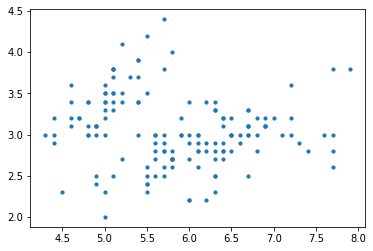

In [9]:
#print(model.cluster_sizes)
data = np.concatenate((model.clusters), axis = 0)
plt.scatter(data[:,0],data[:,1], s=10)


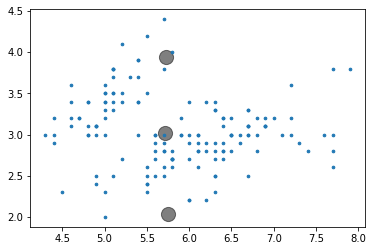

In [10]:
std = np.std(data, axis = 0)
mean = np.mean(data, axis = 0)
centers = np.random.randn(3,data.shape[1])*std + mean
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(data[:,0],data[:,1], s=7)

In [11]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]


In [12]:
df = pd.read_csv('../Data/iris_test_data.txt', names=["s_length", "s_width", "p_length", "p_width"], delim_whitespace=True)
df.head()

,s_length,s_width,p_length,p_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [13]:
data1 = df.values.tolist()
print(data1)

[[5.7, 4.4, 1.5, 0.4], [5.5, 4.2, 1.4, 0.2], [5.2, 4.1, 1.5, 0.1], [5.8, 4.0, 1.2, 0.2], [5.4, 3.9, 1.7, 0.4], [5.4, 3.9, 1.3, 0.4], [7.7, 3.8, 6.7, 2.2], [7.9, 3.8, 6.4, 2.0], [5.1, 3.8, 1.9, 0.4], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.6, 0.2], [5.1, 3.8, 1.5, 0.3], [5.1, 3.7, 1.5, 0.4], [5.4, 3.7, 1.5, 0.2], [5.3, 3.7, 1.5, 0.2], [7.2, 3.6, 6.1, 2.5], [5.0, 3.6, 1.4, 0.2], [4.6, 3.6, 1.0, 0.2], [5.0, 3.5, 1.6, 0.6], [5.2, 3.5, 1.5, 0.2], [5.1, 3.5, 1.4, 0.3], [5.1, 3.5, 1.4, 0.2], [5.0, 3.5, 1.3, 0.3], [5.5, 3.5, 1.3, 0.2], [6.3, 3.4, 5.6, 2.4], [6.2, 3.4, 5.4, 2.3], [6.0, 3.4, 4.5, 1.6], [4.8, 3.4, 1.9, 0.2], [5.4, 3.4, 1.7, 0.2], [5.0, 3.4, 1.6, 0.4], [4.8, 3.4, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.1, 3.4, 1.5, 0.2], [5.0, 3.4, 1.5, 0.2], [4.6, 3.4, 1.4, 0.3], [5.2, 3.4, 1.4, 0.2], [6.3, 3.3, 6.0, 2.5], [6.7, 3.3, 5.7, 2.5], [6.7, 3.3, 5.7, 2.1], [6.3, 3.3, 4.7, 1.6], [5.1, 3.3, 1.7, 0.5], [5.0, 3.3, 1.4, 0.2], [7.2, 3.2, 6.0, 1.8], [6.8, 3.2, 5.9, 2.3], [6.9, 3.2, 5.7, 2.3], [6.4, 3.2

In [14]:
data = np.concatenate((data1), axis = 0)

In [15]:
#plt.scatter(data1[:,0],data1[:,1], s=7)

In [16]:
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

In [17]:
print(X_train)

[[-11.05794875   2.35758008]
 [  3.30025999   6.92264204]
 [-11.60050708   2.89695028]
 [-10.42239289   3.94600093]
 [  2.29034449   8.11011278]
 [  2.43925569   8.78538034]
 [  7.46559415   6.01476085]
 [  7.50098576   4.98996139]
 [ -8.94241199   2.08163347]
 [ -9.52754961   5.25803866]
 [ -8.71671376   3.64679119]
 [  1.49704227   6.91368146]
 [  7.72194461   8.2373802 ]
 [  8.04398719   8.61892674]
 [  8.18418614   7.10545678]
 [ -9.13281188   2.40621   ]
 [ -0.17865027   8.29570927]
 [ -9.37601995   3.42572178]
 [  8.3015357    7.96423462]
 [  7.61518248   5.72643487]
 [-10.21728366   4.055909  ]
 [ -9.80504109   2.44903849]
 [  1.86140464   7.72595353]
 [  6.78523197   5.36459066]
 [  2.93205302   7.67845969]
 [  2.20064052   9.31206357]
 [-10.14307823   3.75230762]
 [  1.05007191   8.27779615]
 [ -8.74736337   3.16444618]
 [  9.6970377    4.33805308]
 [  6.06757849   7.32404507]
 [  6.32163327   6.86240514]
 [  1.84943529   5.43892028]
 [  8.97714638   6.84380574]
 [ -8.85942059

In [18]:
df = pd.read_csv('../Data/iris_test_data.txt', names=["s_length", "s_width", "p_length", "p_width"], delim_whitespace=True)

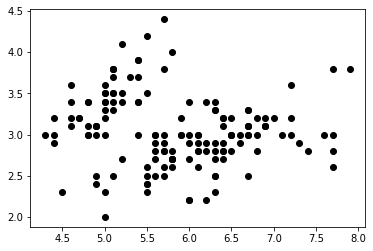

In [19]:
data = df.values[:, 0:4]
plt.scatter(data[:,0],data[:,1],c='black')
plt.show()

In [20]:
max_iteration = 2
def Distance2Point(a, b):
       return np.sqrt(sum(np.square(a-b)))

In [21]:
def KMean(data):
    
    centroids = {}

    for i in range(k):
        centroids[i] = data[i]

    classes = {}
    for iteration in range(max_iteration):
        classes = {}

        for classKey in range(k):
            classes[classKey] = []

        for dataPoint in data: 
            Distance = []
            for centroid in centroids:
                dis = Distance2Point(dataPoint, centroids[centroid])
                Distance.append(dis)

            minDis = min(Distance)
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dataPoint)

        oldCentroid = dict(centroids)

        for classKey in classes:
            classData = classes[classKey]
            NewCentroid = np.mean(classData, axis = 0)
            centroids[classKey] = NewCentroid

        isFine = True

        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centroids[centroid]

            if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                isFine = False

        if isFine:
            break
    return centroids, classes

In [22]:
centroids, classes = KMean(data[:, :4])
centroids

{0: array([6.33763441, 2.90430108, 5.01827957, 1.72258065]),
 1: array([5.256, 3.692, 1.456, 0.26 ]),
 2: array([4.865625, 2.990625, 1.896875, 0.409375])}

In [27]:
classes

{0: [array([7.7, 3.8, 6.7, 2.2]),
  array([7.9, 3.8, 6.4, 2. ]),
  array([7.2, 3.6, 6.1, 2.5]),
  array([6.3, 3.4, 5.6, 2.4]),
  array([6.2, 3.4, 5.4, 2.3]),
  array([6. , 3.4, 4.5, 1.6]),
  array([6.3, 3.3, 6. , 2.5]),
  array([6.7, 3.3, 5.7, 2.5]),
  array([6.7, 3.3, 5.7, 2.1]),
  array([6.3, 3.3, 4.7, 1.6]),
  array([7.2, 3.2, 6. , 1.8]),
  array([6.8, 3.2, 5.9, 2.3]),
  array([6.9, 3.2, 5.7, 2.3]),
  array([6.4, 3.2, 5.3, 2.3]),
  array([6.5, 3.2, 5.1, 2. ]),
  array([5.9, 3.2, 4.8, 1.8]),
  array([7. , 3.2, 4.7, 1.4]),
  array([6.4, 3.2, 4.5, 1.5]),
  array([6.7, 3.1, 5.6, 2.4]),
  array([6.4, 3.1, 5.5, 1.8]),
  array([6.9, 3.1, 5.4, 2.1]),
  array([6.9, 3.1, 5.1, 2.3]),
  array([6.9, 3.1, 4.9, 1.5]),
  array([6.7, 3.1, 4.7, 1.5]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([7.6, 3. , 6.6, 2.1]),
  array([7.7, 3. , 6.1, 2.3]),
  array([7.1, 3. , 5.9, 2.1]),
  array([6.5, 3. , 5.8, 2.2]),
  array([7.2, 3. , 5.8, 1.6]),
  array([6.8, 3. , 5.5, 2.1]),
  array([6.5, 3. , 5.5, 1.8]),
  arr

In [24]:
centroids = np.array(list(centroids.values()))
centroids

array([[6.33763441, 2.90430108, 5.01827957, 1.72258065],
       [5.256     , 3.692     , 1.456     , 0.26      ],
       [4.865625  , 2.990625  , 1.896875  , 0.409375  ]])

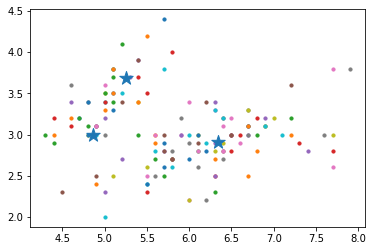

In [26]:
n = 150
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='*',s=200)

In [ ]:
data = df.values[:, 0:4]
plt.scatter(data[:,0],data[:,1],c='black')
plt.scatter(avg[:,0], avg[:,1], marker='*',s=200)

In [53]:
for x,y in classes.items():
    dtm = np.concatenate((x,y), axis = 0)
dtm

ValueError: zero-dimensional arrays cannot be concatenated

In [64]:
for x in classes.values():
    print(x)
    print(":)")

[array([7.7, 3.8, 6.7, 2.2]), array([7.9, 3.8, 6.4, 2. ]), array([7.2, 3.6, 6.1, 2.5]), array([6.3, 3.4, 5.6, 2.4]), array([6.2, 3.4, 5.4, 2.3]), array([6. , 3.4, 4.5, 1.6]), array([6.3, 3.3, 6. , 2.5]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3.3, 5.7, 2.1]), array([6.3, 3.3, 4.7, 1.6]), array([7.2, 3.2, 6. , 1.8]), array([6.8, 3.2, 5.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3.2, 5.1, 2. ]), array([5.9, 3.2, 4.8, 1.8]), array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.7, 3.1, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.9, 3.1, 5.1, 2.3]), array([6.9, 3.1, 4.9, 1.5]), array([6.7, 3.1, 4.7, 1.5]), array([6.7, 3.1, 4.4, 1.4]), array([7.6, 3. , 6.6, 2.1]), array([7.7, 3. , 6.1, 2.3]), array([7.1, 3. , 5.9, 2.1]), array([6.5, 3. , 5.8, 2.2]), array([7.2, 3. , 5.8, 1.6]), array([6.8, 3. , 5.5, 2.1]), array([6.5, 3. , 5.5, 1.8]), array([6.7, 3. , 5.2, 2.3]), array([6.5, 3. , 5.2, 2. ]), array([5.9, 3

In [71]:
for x, y in classes.items():
  print(y.)


[array([7.7, 3.8, 6.7, 2.2]), array([7.9, 3.8, 6.4, 2. ]), array([7.2, 3.6, 6.1, 2.5]), array([6.3, 3.4, 5.6, 2.4]), array([6.2, 3.4, 5.4, 2.3]), array([6. , 3.4, 4.5, 1.6]), array([6.3, 3.3, 6. , 2.5]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3.3, 5.7, 2.1]), array([6.3, 3.3, 4.7, 1.6]), array([7.2, 3.2, 6. , 1.8]), array([6.8, 3.2, 5.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3.2, 5.1, 2. ]), array([5.9, 3.2, 4.8, 1.8]), array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.7, 3.1, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.9, 3.1, 5.1, 2.3]), array([6.9, 3.1, 4.9, 1.5]), array([6.7, 3.1, 4.7, 1.5]), array([6.7, 3.1, 4.4, 1.4]), array([7.6, 3. , 6.6, 2.1]), array([7.7, 3. , 6.1, 2.3]), array([7.1, 3. , 5.9, 2.1]), array([6.5, 3. , 5.8, 2.2]), array([7.2, 3. , 5.8, 1.6]), array([6.8, 3. , 5.5, 2.1]), array([6.5, 3. , 5.5, 1.8]), array([6.7, 3. , 5.2, 2.3]), array([6.5, 3. , 5.2, 2. ]), array([5.9, 3

In [41]:
newdf=df.to_numpy()

In [72]:
classes.items()

dict_items([(0, [array([7.7, 3.8, 6.7, 2.2]), array([7.9, 3.8, 6.4, 2. ]), array([7.2, 3.6, 6.1, 2.5]), array([6.3, 3.4, 5.6, 2.4]), array([6.2, 3.4, 5.4, 2.3]), array([6. , 3.4, 4.5, 1.6]), array([6.3, 3.3, 6. , 2.5]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3.3, 5.7, 2.1]), array([6.3, 3.3, 4.7, 1.6]), array([7.2, 3.2, 6. , 1.8]), array([6.8, 3.2, 5.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3.2, 5.1, 2. ]), array([5.9, 3.2, 4.8, 1.8]), array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.7, 3.1, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.9, 3.1, 5.1, 2.3]), array([6.9, 3.1, 4.9, 1.5]), array([6.7, 3.1, 4.7, 1.5]), array([6.7, 3.1, 4.4, 1.4]), array([7.6, 3. , 6.6, 2.1]), array([7.7, 3. , 6.1, 2.3]), array([7.1, 3. , 5.9, 2.1]), array([6.5, 3. , 5.8, 2.2]), array([7.2, 3. , 5.8, 1.6]), array([6.8, 3. , 5.5, 2.1]), array([6.5, 3. , 5.5, 1.8]), array([6.7, 3. , 5.2, 2.3]), array([6.5, 3. , 5.2, 2. ]

In [70]:
l = []
for i in newdf:
    for x, y in classes.items():
        if newdf[i] = y
            l[i]=x

SyntaxError: invalid syntax (<ipython-input-70-77d77c165112>, line 4)